In [2]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
from planetdfq import Planet


In [11]:
earth_mass = 5.97e24 # kg
earth_radius = 6.3e6 # m
pa_to_atm = 1/9.86923e-6 # pa / atm

(1000.0, 100000000.0)

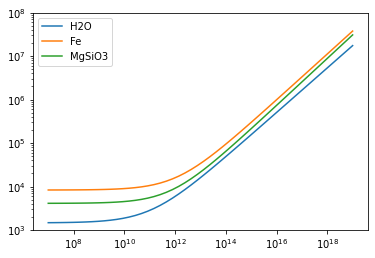

In [12]:
# testing the equation of state
test = Planet()
materials = ['H2O', 'Fe', 'MgSiO3']
for mat in materials:
    ps = np.logspace(7, 19)
    rho = test.eos(mat, ps, 0)
    plt.plot(ps, rho, label = mat)

plt.legend()
plt.loglog()
plt.ylim(1e3, 1e8)

In [13]:
# testing cp integration relation
water = Planet('H2O')
cps = np.geomspace(1e10, 1e19, 25)
steps = int(1e6)
r, m = water.integrateCP(cps, 0, 10, 1e7, 0, steps = steps, stop_pressure = 1, step_type = 'log')

finished 1/5 of central pressures...
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.4797360837050D+07   r2 =                  NaN


/home/cosinga/intoexo/planetdfq.py:74: RuntimeWarning: invalid value encountered in double_scalars
  return rho0 + c*pressure**n
/home/cosinga/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.6757441548203D+07   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.9207566467321D+07   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1206845811153D+08   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1516917974045D+08   r2 =                  NaN
finished 1/5 of central pressures...
 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1828666018842D+08   r2 =                  NaN
 lsoda--  at t (=r1), too much accuracy requested    
       for pre

In [14]:
r

array([ 4797308.87010751,  6757403.14780973,  9207547.41875627,
       12068355.13474656, 15169112.80451998, 18286654.60672451,
       21207248.55589732, 23775758.2446815 , 25911730.22764305,
       27599705.04954973, 28867984.29893131, 29769975.26322847,
       30366901.61522653, 30720090.26297822, 30883925.04339889,
       30905693.26993318, 30822118.71608068, 30662424.12953183,
       30449662.51746202, 30199967.80732112, 29925021.83981835,
       29633740.38416163, 29331918.34608875, 29024748.33369047,
       28714050.38392655])

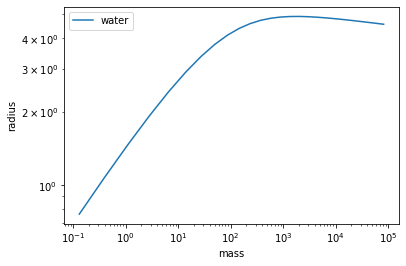

In [16]:
plt.plot(m / earth_mass, r / earth_radius, label = 'water')
plt.loglog()
plt.xlabel('mass')
plt.ylabel('radius')
plt.legend()

In [ ]:
plt.plot